<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;" />

# NumPy: Entrada/Salida

Con E/S (I/O en inglés) entendemos leer y escribir datos archivos. Es algo que necesitaremos hacer con relativa frecuencia, y en NumPy es muy sencillo de hacer. Para el caso de la **lectura** se usa la función `np.loadtxt`.

## Ejemplo con datos de temperaturas 

Para practicar, vamos a leer el archivo `temperaturas.csv` que contiene datos diarios de temperaturas en Nueva York entre el 1 de enero de 2013 y el 1 de enero de 2014, obtenidos gratuitamente de http://ncdc.noaa.gov/. Como los hemos descargado en formato CSV habrá que tener algunas precauciones a la hora de leer el archivo.

In [1]:
!head ../data/temperaturas.csv  # Esta línea no funciona en Windows

STATION,DATE,TMAX,TMIN
GHCND:USW00094728,20130101,44,-33
GHCND:USW00094728,20130102,6,-56
GHCND:USW00094728,20130103,0,-44
GHCND:USW00094728,20130104,28,-11
GHCND:USW00094728,20130105,56,0
GHCND:USW00094728,20130106,78,11
GHCND:USW00094728,20130107,72,28
GHCND:USW00094728,20130108,89,17
GHCND:USW00094728,20130109,94,39


In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
datos = np.loadtxt("../data/temperaturas.csv",
                   skiprows=1,  # Saltamos una línea
                   usecols=(1, 2, 3),  # Solo columnas 2, 3 y 4
                   delimiter=',')  # Separados por comas

In [5]:
datos[:9]

array([[  2.01301010e+07,   4.40000000e+01,  -3.30000000e+01],
       [  2.01301020e+07,   6.00000000e+00,  -5.60000000e+01],
       [  2.01301030e+07,   0.00000000e+00,  -4.40000000e+01],
       [  2.01301040e+07,   2.80000000e+01,  -1.10000000e+01],
       [  2.01301050e+07,   5.60000000e+01,   0.00000000e+00],
       [  2.01301060e+07,   7.80000000e+01,   1.10000000e+01],
       [  2.01301070e+07,   7.20000000e+01,   2.80000000e+01],
       [  2.01301080e+07,   8.90000000e+01,   1.70000000e+01],
       [  2.01301090e+07,   9.40000000e+01,   3.90000000e+01]])

La primera columna es un entero con formato "AAAAMMDD" que vamos a ignorar. Las temperaturas están medidas en décimas de grado Celsius, así que hay que pasarlas a grados Celsius. Vamos a calcular también la temperatura media.

In [6]:
Tmax = datos[:, 1] / 10
Tmin = datos[:, 2] / 10
Tavg = (Tmax + Tmin) / 2

Como vamos a ignorar la columna de las fechas tenemos que crear un dominio para el eje x. Simplemente construiremos un array de enteros desde 0 hasta 365.

In [7]:
x = np.arange(366)

Supongamos que ahora queremos guardar nuestra tabla de datos en un archivo txt, para poder cargarlo ya modificado más adelante. Una manera fácil de hacerlo sería con otra función de NumPy: `np.savetxt`. Lo usaremos con los argumentos opcionales  `fmt='%.5f', newline = '\r\n'` para obtener un fichero *bonito* que podamos entender de un vistazo.

In [8]:
matriz_datos = np.zeros([366, 4])
matriz_datos[:, 0] = x
matriz_datos[:, 1] = Tmax
matriz_datos[:, 2] = Tmin
matriz_datos[:, 3] = Tavg

print(matriz_datos[:10])

# np.savetxt('archivo_datos.txt', matriz_datos, fmt='%.5f', newline = '\r\n')

[[ 0.    4.4  -3.3   0.55]
 [ 1.    0.6  -5.6  -2.5 ]
 [ 2.    0.   -4.4  -2.2 ]
 [ 3.    2.8  -1.1   0.85]
 [ 4.    5.6   0.    2.8 ]
 [ 5.    7.8   1.1   4.45]
 [ 6.    7.2   2.8   5.  ]
 [ 7.    8.9   1.7   5.3 ]
 [ 8.    9.4   3.9   6.65]
 [ 9.    8.3   4.4   6.35]]


##### Ejercicio

Y ahora representamos la evolución de la temperatura media (por ejemplo de color negro), indicando "Daily summaries" en el título, "Days" en el eje x y "Temperature (C)" en el eje y, usando la interfaz orientada a objetos de matplotlib (función `plt.subplots`). Podemos crear una zona rellena entre la máxima y la mínima con la función `fill_between(x, max, min)` (por ejemplo de color #4f88b1). Si los límites del eje x no quedan como queremos podemos usar la función `set_xlim(xmin, xmax)`.

In [9]:
import matplotlib.pyplot as plt

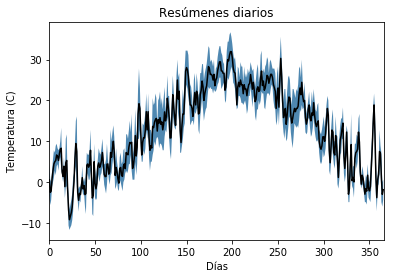

In [10]:
fig, ax = plt.subplots()

ax.plot(x, Tavg, 'k')
ax.set_xlim(0, 366)
ax.fill_between(x, Tmin, Tmax, facecolor='#4f88b1', edgecolor='none')
ax.set_title("Resúmenes diarios")
ax.set_xlabel("Días")
ax.set_ylabel("Temperatura (C)")

---

## Ejemplo datos calidad del aire 

In [11]:
from IPython.display import HTML
HTML('<iframe src="http://www.mambiente.munimadrid.es/sica/scripts/index.php" \
            width="700" height="400"></iframe>')

### Cargando los datos

In [12]:
# Linux command 
!head ../data/barrio_del_pilar-20160322.csv

# Windows
# !gc log.txt | select -first 10 # head

Estación: Barrio del Pilar;;;;
Fecha;Hora;CO;NO2;O3
;;mg/m³;µg/m³;µg/m³
22/03/2016;01:00;0.2;14;73
22/03/2016;02:00;0.2;10;77
22/03/2016;03:00;0.2;9;75
22/03/2016;04:00;0.2;3;81
22/03/2016;05:00;0.2;3;81
22/03/2016;06:00;0.2;6;79
22/03/2016;07:00;0.2;24;59


In [13]:
# loading the data
# ./data/barrio_del_pilar-20160322.csv
data1 = np.genfromtxt('../data/barrio_del_pilar-20160322.csv', skip_header=3, delimiter=';', usecols=(2,3,4))
data1

array([[   0.2,   14. ,   73. ],
       [   0.2,   10. ,   77. ],
       [   0.2,    9. ,   75. ],
       [   0.2,    3. ,   81. ],
       [   0.2,    3. ,   81. ],
       [   0.2,    6. ,   79. ],
       [   0.2,   24. ,   59. ],
       [   0.3,   48. ,   37. ],
       [   0.3,   40. ,   43. ],
       [   0.3,   41. ,   44. ],
       [   0.3,   20. ,   68. ],
       [   0.3,   17. ,   74. ],
       [   0.2,   14. ,   84. ],
       [   0.3,   16. ,   88. ],
       [   0.3,   15. ,   94. ],
       [   0.4,   29. ,   81. ],
       [   0.3,   23. ,   82. ],
       [   0.3,   26. ,   81. ],
       [   0.3,   30. ,   75. ],
       [   0.4,   57. ,   39. ],
       [   0.4,   73. ,   17. ],
       [   0.4,   51. ,   42. ],
       [   0.4,   72. ,   16. ],
       [   0.4,   61. ,   28. ],
       [   0.3,   25. ,   62. ],
       [   0.3,   21. ,   64. ],
       [   0.3,   40. ,   39. ],
       [   0.4,   52. ,   19. ],
       [   0.4,   47. ,    8. ],
       [   0.4,   42. ,    8. ],
       [  

### Valores inexistentes

In [14]:
np.mean(data1, axis=0)

array([ nan,  nan,  nan])

In [15]:
np.nanmean(data1, axis=0)

array([  0.33717277,  29.79581152,  55.47643979])

In [16]:
# masking invalid data
data1 = np.ma.masked_invalid(data1)
np.mean(data1, axis=0)

masked_array(data = [0.3371727748691094 29.79581151832461 55.47643979057592],
             mask = [False False False],
       fill_value = 1e+20)

In [17]:
data2 = np.genfromtxt('../data/barrio_del_pilar-20151222.csv', skip_header=3, delimiter=';', usecols=(2,3,4))
data2 = np.ma.masked_invalid(data2)

### Pintando los datos

**Valores máximos ** obtenidos de: http://www.mambiente.munimadrid.es/opencms/export/sites/default/calaire/Anexos/valores_limite_1.pdf

* NO2
    - Media anual: 40 µg/m3
    - **Media horaria: 200 µg/m3 **

(0, 220)

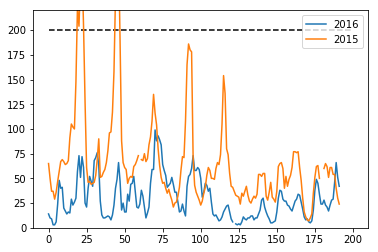

In [18]:
plt.plot(data1[:, 1], label='2016')
plt.plot(data2[:, 1], label='2015')

plt.legend()

plt.hlines(200, 0, 200, linestyles='--')
plt.ylim(0, 220)

In [19]:
from IPython.display import HTML
HTML('<iframe src="http://ccaa.elpais.com/ccaa/2015/12/24/madrid/1450960217_181674.html" width="700" height="400"></iframe>')

* CO 
    - **Máxima diaria de las medias móviles octohorarias: 10 mg/m³**

In [20]:
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.convolve.html
def moving_average(x, N=8):
    return np.convolve(x, np.ones(N)/N, mode='same')

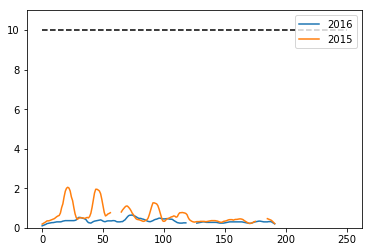

In [21]:
plt.plot(moving_average(data1[:, 0]), label='2016')

plt.plot(moving_average(data2[:, 0]), label='2015')

plt.hlines(10, 0, 250, linestyles='--')
plt.ylim(0, 11)

plt.legend()

* O3
    - **Máxima diaria de las medias móviles octohorarias: 120 µg/m3**
    - Umbral de información. 180 µg/m3
    - Media horaria. Umbral de alerta. 240 µg/m3

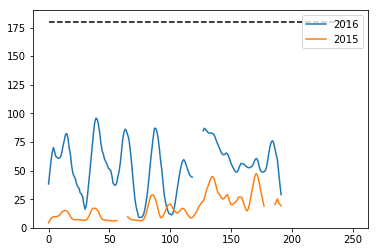

In [22]:
plt.plot(moving_average(data1[:, 2]), label='2016')
#plt.plot(data1[:, 2])

plt.plot(moving_average(data2[:, 2]), label='2015')
#plt.plot(data2[:, 2])

plt.hlines(180, 0, 250, linestyles='--')
plt.ylim(0, 190)

plt.legend()

## ¿Cómo leeríamos un archivo sin usar NumPy?

In [23]:
data_file = '../data/barrio_del_pilar-20151222.csv'

In [24]:
data = []

with open(data_file) as f:
    # Saltamos las tres primeras líneas
    for ii in range(3):
        f.readline()
    
    for line in f:
        line_string = line
        line_list = line.split(';')
        
        date = line_list[0]
        hour = line_list[1]
        
        components_data = []
        for c in line_list[2:]:
            if '-' not in c:
                components_data.append(float(c))
            else:
                components_data.append(np.nan)
        data.append(components_data)
        
print(np.array(data))    

[[  5.00000000e-01   6.50000000e+01   7.00000000e+00]
 [  4.00000000e-01   5.00000000e+01   7.00000000e+00]
 [  3.00000000e-01   3.70000000e+01   1.10000000e+01]
 [  3.00000000e-01   3.70000000e+01   1.00000000e+01]
 [  3.00000000e-01   2.90000000e+01   1.70000000e+01]
 [  3.00000000e-01   3.60000000e+01   1.30000000e+01]
 [  3.00000000e-01   4.70000000e+01   7.00000000e+00]
 [  4.00000000e-01   5.70000000e+01   6.00000000e+00]
 [  5.00000000e-01   6.70000000e+01   6.00000000e+00]
 [  5.00000000e-01   6.90000000e+01   8.00000000e+00]
 [  5.00000000e-01   6.70000000e+01   1.10000000e+01]
 [  5.00000000e-01   6.40000000e+01   1.50000000e+01]
 [  5.00000000e-01   6.50000000e+01   2.10000000e+01]
 [  5.00000000e-01   6.80000000e+01   2.40000000e+01]
 [  7.00000000e-01   9.10000000e+01   1.90000000e+01]
 [  8.00000000e-01   1.05000000e+02   1.30000000e+01]
 [  8.00000000e-01   1.02000000e+02   1.00000000e+01]
 [  7.00000000e-01   1.00000000e+02   8.00000000e+00]
 [  1.50000000e+00   1.48000

---

_Ya hemos aprendido a efectuar algunas operaciones útiles con NumPy e incluso hemos hecho nuestro primer ejercicio de lectura de datos. Estamos en condiciones de empezar a escribir programas más interesantes, pero aún queda lo mejor._

Si quieres saber más sobre lectura y escritura de ficheros en Python, puedes consultar al documentación oficial:

https://docs.python.org/3.5/tutorial/inputoutput.html#reading-and-writing-files

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano, Mabel Delgado y Álex Sáez 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [29]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())